#### Dataset Used: Titanic Dataset
#### Name: Rajath C Aralikatti
#### Roll No: 181CO241 Section 2

### ID3 - Uses Information Gain as the splitting criterion.
### CART - Uses Gini Index as the splitting criterion.

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data from titanic.csv

In [3]:
df = pd.read_csv('./Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping Redundant Columns and removing Rows with Missing Data (Data Pre-Processing)

In [4]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [6]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [7]:
print(df.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64


In [8]:
print(df.shape)

(891, 7)


In [9]:
df = df.dropna()
print(df.shape)

(712, 7)


In [10]:
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [11]:
print(df.groupby('Survived').size())

Survived
0    424
1    288
dtype: int64


## Replacing Strings with Numeric Data

- Column: Sex<br>
>Female : 0<br>
>Male : 1<br><br>

- Column: Embarked<br>
>C : 0<br>
>Q : 1<br>
>S : 2

In [12]:
df = df.replace(to_replace='female', value=0)
df = df.replace(to_replace='male', value=1)

df = df.replace(to_replace='C', value=0)
df = df.replace(to_replace='Q', value=1)
df = df.replace(to_replace='S', value=2)

## Splitting data between Train and Test sets

In [13]:
train, test = train_test_split(df, test_size=0.3, stratify=df['Survived'], random_state=0)
print('Train Shape', train.shape, '\n', train.groupby('Survived').size())
print('\nTest Shape', train.shape, '\n', test.groupby('Survived').size())

Train Shape (498, 7) 
 Survived
0    297
1    201
dtype: int64

Test Shape (498, 7) 
 Survived
0    127
1     87
dtype: int64


In [14]:
y_train = train.pop('Survived')
y_test = test.pop('Survived')
x_train = train
x_test = test

# Without Pruning

## ID3

In [15]:
def results(y_test, y_predict):
  print('Accuracy -', (accuracy_score(y_test, y_predict) * 100))
  print('Report\n', classification_report(y_test, y_predict))

In [16]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
id3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [17]:
print("ID3 decision tree")
y_pred = id3.predict(x_test)
results(y_test, y_pred)

ID3 decision tree
Accuracy - 81.30841121495327
Report
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       127
           1       0.78      0.76      0.77        87

    accuracy                           0.81       214
   macro avg       0.81      0.80      0.81       214
weighted avg       0.81      0.81      0.81       214



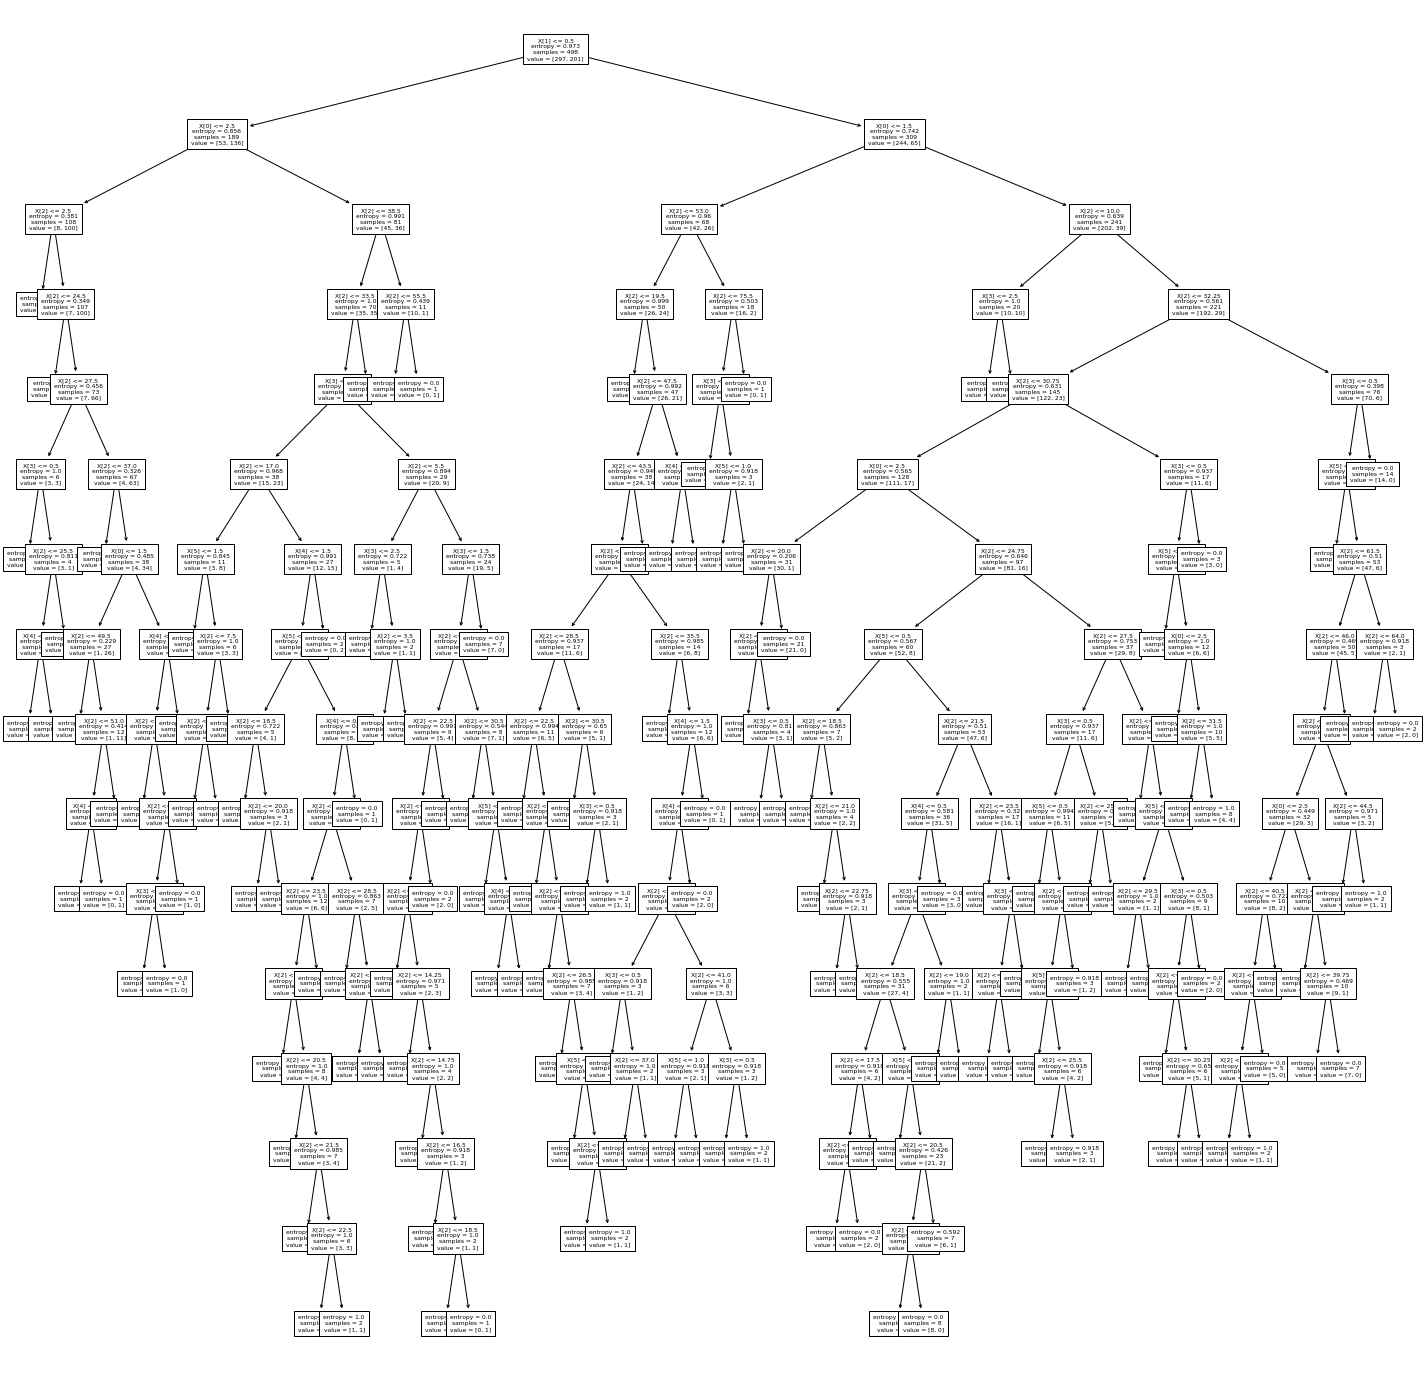

In [18]:
plt.figure(figsize=(25, 25))
plot_tree(id3, fontsize=6)
plt.show()

## CART

In [19]:
cart = DecisionTreeClassifier(criterion='gini', random_state=0)
cart.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
print("CART decision tree")
y_pred = cart.predict(x_test)
results(y_test, y_pred)

CART decision tree
Accuracy - 80.8411214953271
Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       127
           1       0.77      0.76      0.76        87

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214



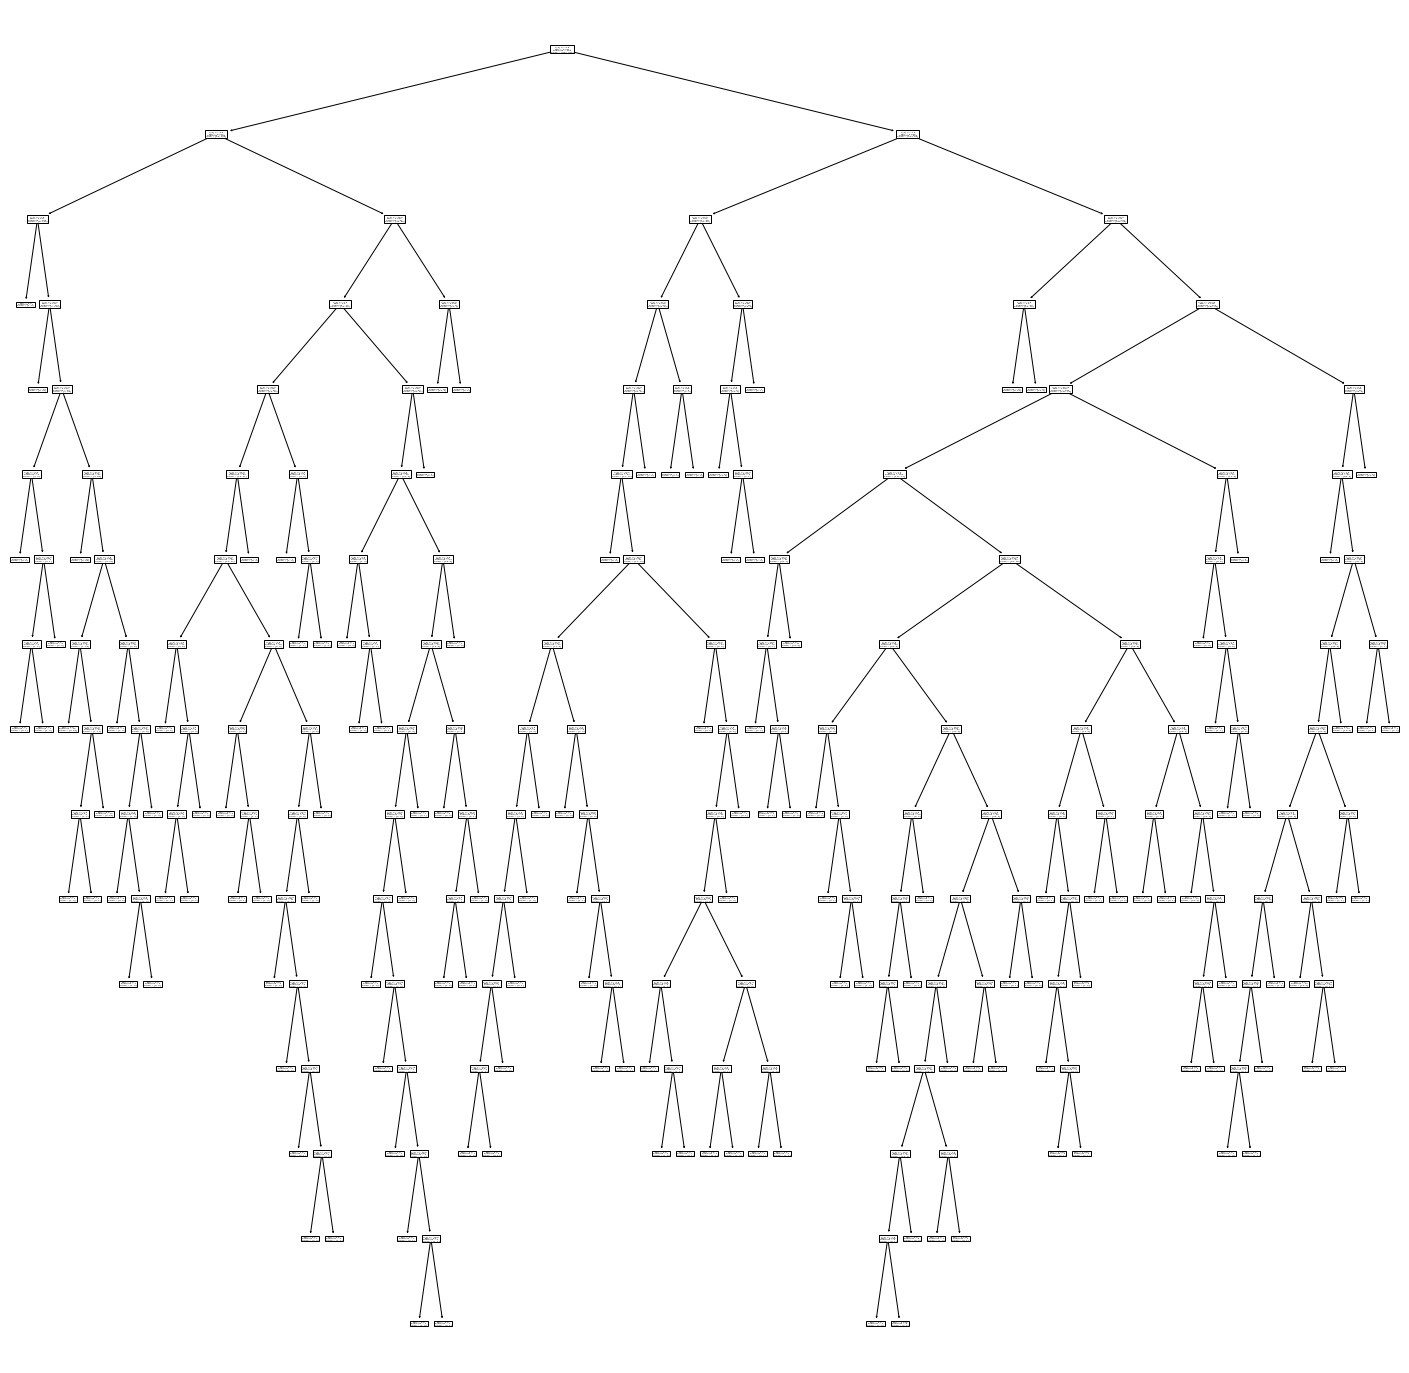

In [21]:
plt.figure(figsize=(25, 25))
plot_tree(cart)
plt.show()

# With Pruning

Pruning was done with the following parameters
- max_depth: maximum depth of decision tree
- min_sample_split: The minimum number of samples required to split an internal node:
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

## ID3 Pruned

In [22]:
id3_prune = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=10, min_samples_leaf=5, min_samples_split=10)
id3_prune.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
print("Pruned ID3 decision tree")
y_pred = id3_prune.predict(x_test)
results(y_test, y_pred)

Pruned ID3 decision tree
Accuracy - 83.64485981308411
Report
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       127
           1       0.81      0.78      0.80        87

    accuracy                           0.84       214
   macro avg       0.83      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214



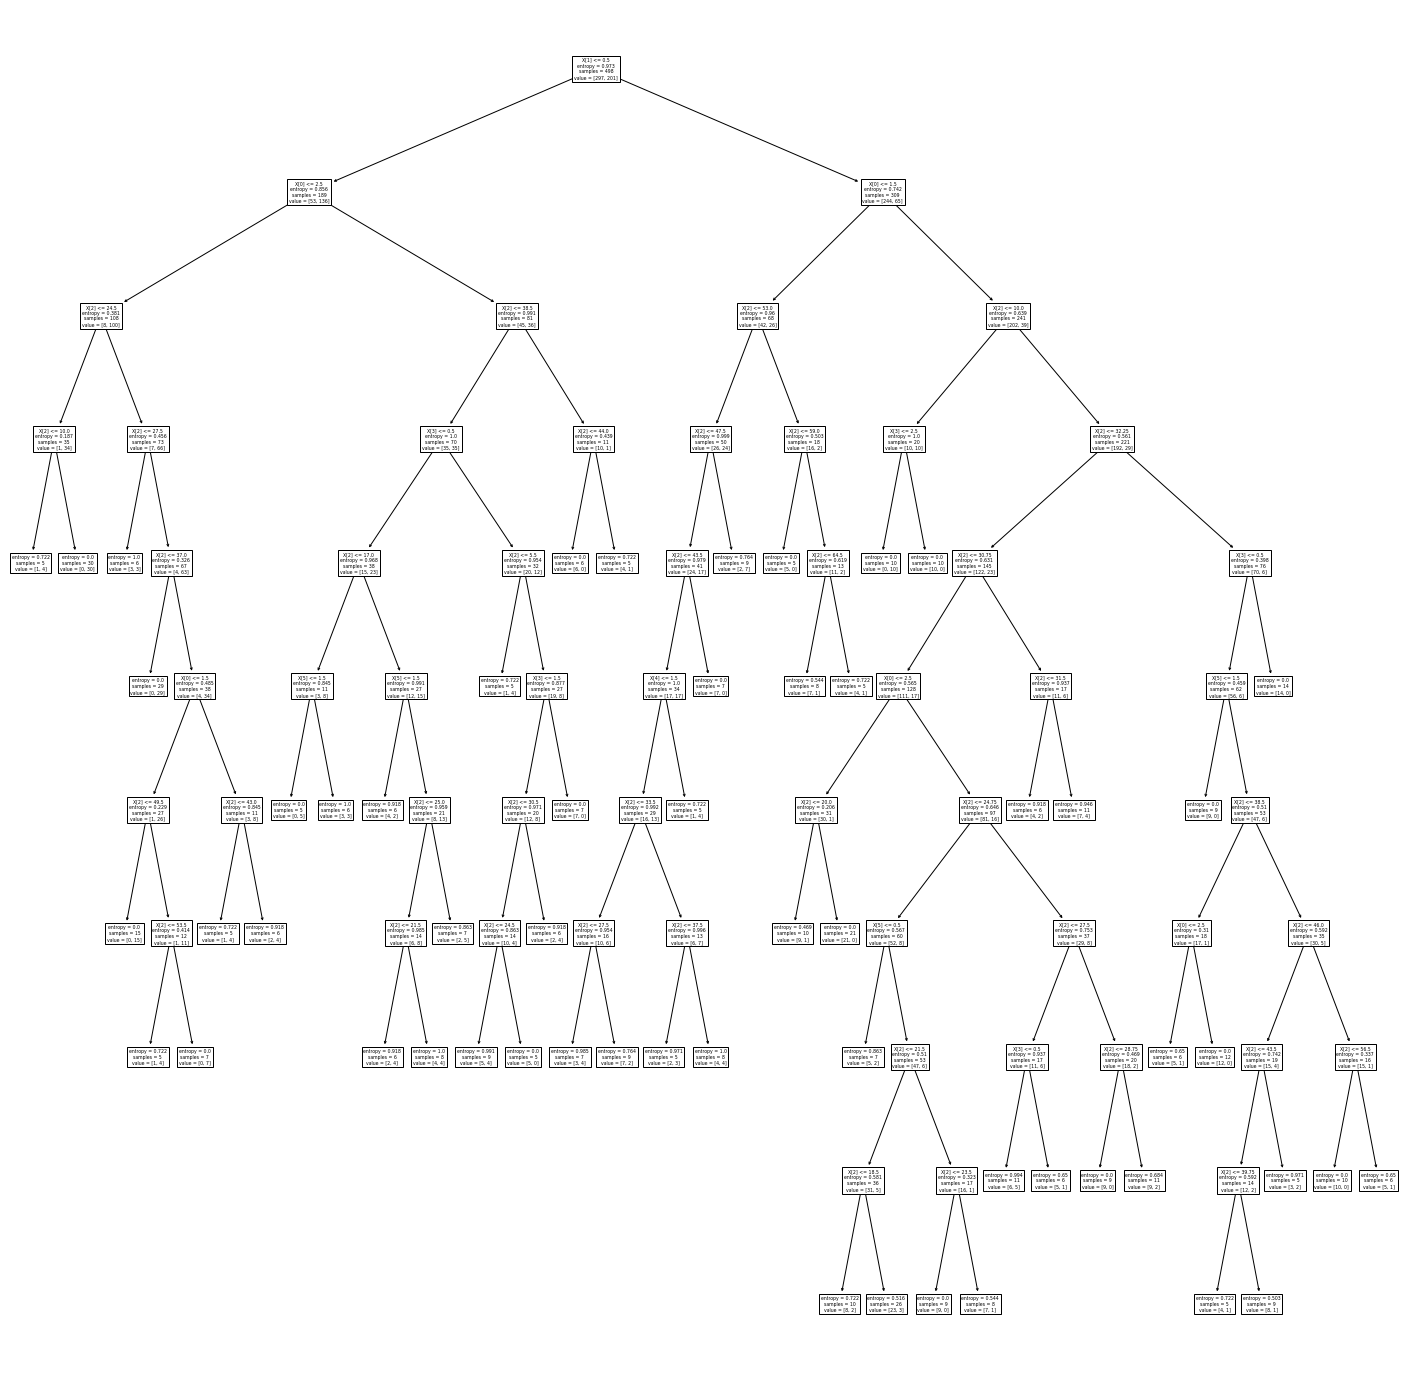

In [24]:
plt.figure(figsize=(25, 25))
plot_tree(id3_prune)
plt.show()

## CART Pruned

In [25]:
cart_prune = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=10, min_samples_leaf=5, min_samples_split=10)
cart_prune.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
print("Pruned CART decision tree")
y_pred = cart_prune.predict(x_test)
results(y_test, y_pred)

Pruned CART decision tree
Accuracy - 83.17757009345794
Report
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       127
           1       0.81      0.76      0.79        87

    accuracy                           0.83       214
   macro avg       0.83      0.82      0.82       214
weighted avg       0.83      0.83      0.83       214



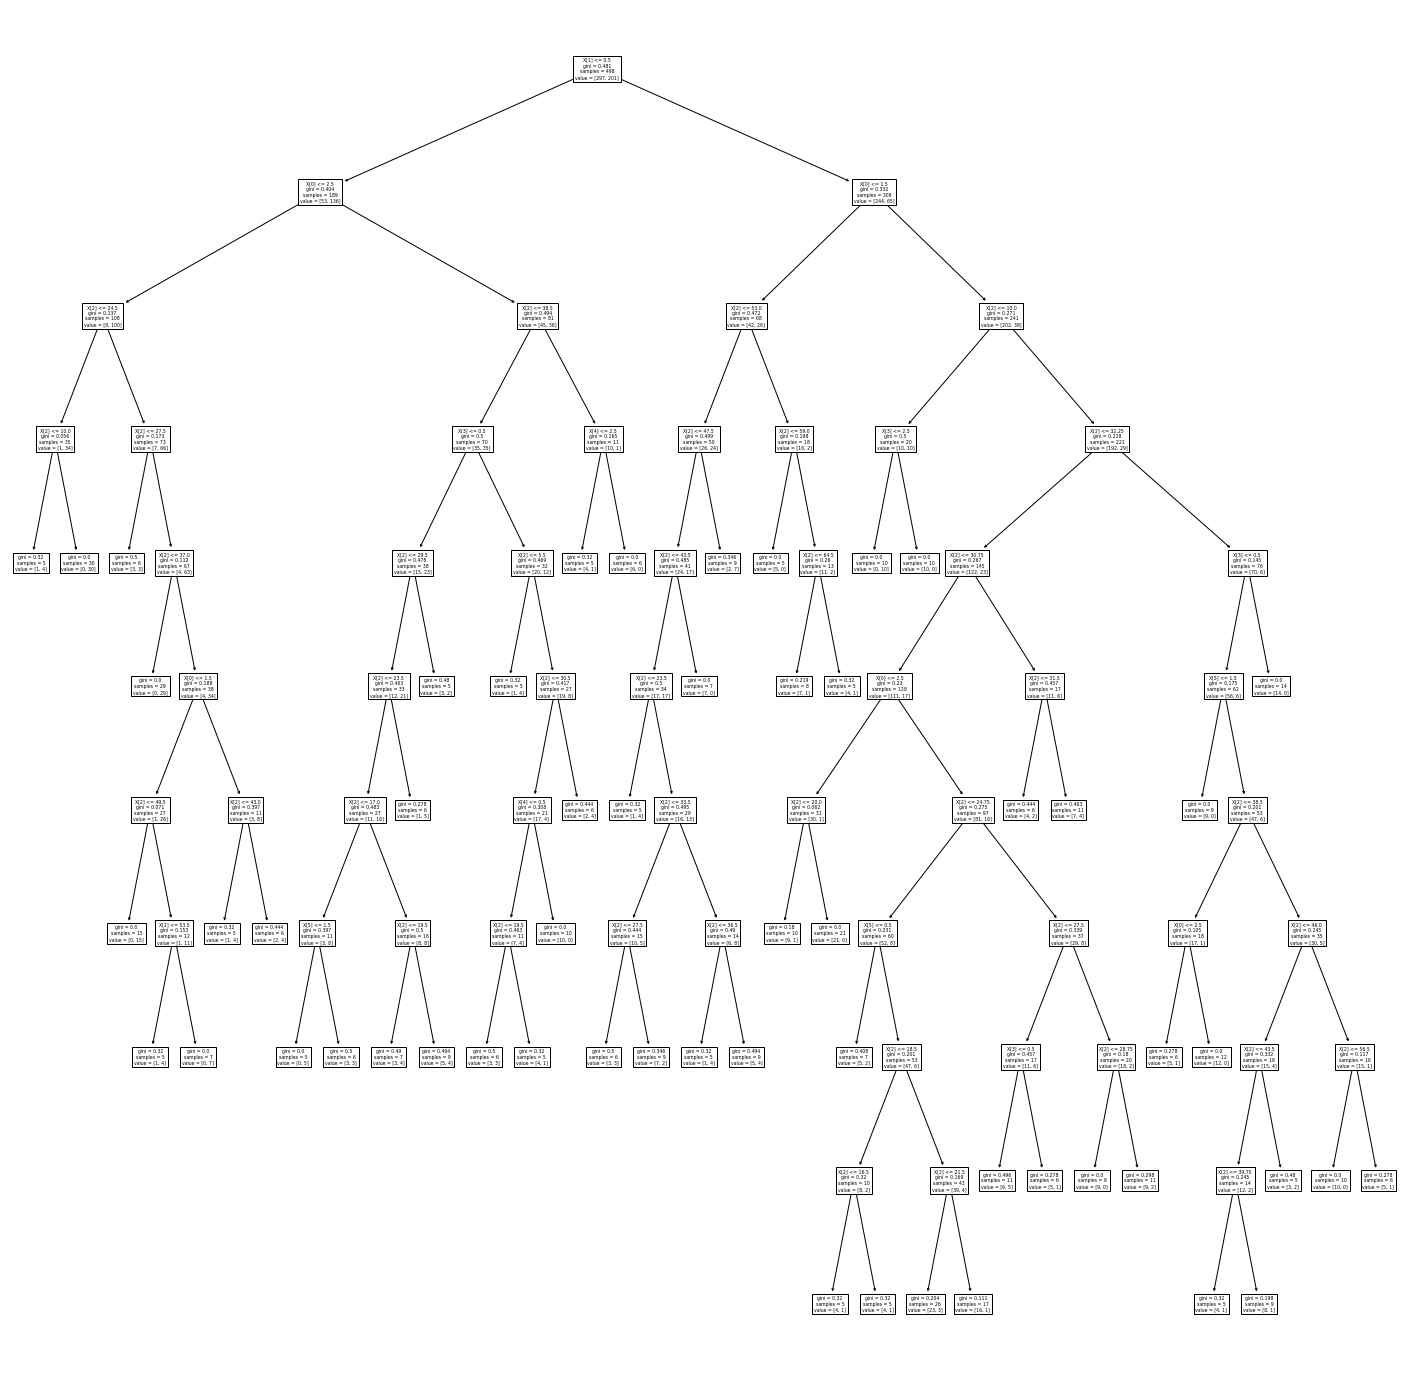

In [27]:
plt.figure(figsize=(25, 25))
plot_tree(cart_prune)
plt.show()

## Comparision

- ID3 : 81.30841121495327
- ID3 Pruned : 83.64485981308411
<br><br>
- CART : 80.8411214953271
- CART Pruned : 83.17757009345794